In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [3]:
def process(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    
    for col in ['Age_categories','Fare_categories','Title','Cabin_type','Sex']:
        df = create_dummies(df, col)
        
    return df

train = process(train)
holdout = process(holdout)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
PassengerId                   891 non-null int64
Survived                      891 non-null int64
Pclass                        891 non-null int64
Name                          891 non-null object
Sex                           891 non-null object
Age                           891 non-null float64
SibSp                         891 non-null int64
Parch                         891 non-null int64
Ticket                        891 non-null object
Fare                          891 non-null float64
Embarked                      891 non-null object
Age_categories                891 non-null category
Fare_categories               891 non-null category
Title                         891 non-null object
Cabin_type                    891 non-null object
Age_categories_Missing        891 non-null uint8
Age_categories_Infant         891 non-null uint8
Age_categories_Child          891 non-null uin

In [5]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

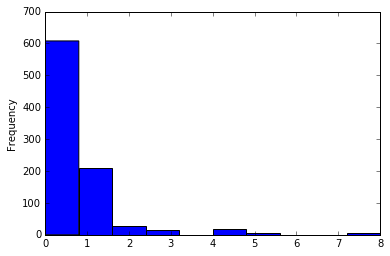

In [6]:
%matplotlib inline
train['SibSp'].plot.hist()

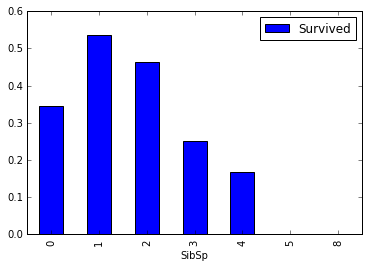

In [7]:
sibsp_pivot = train.pivot_table(index='SibSp',values='Survived')
sibsp_pivot.plot.bar()

In [8]:
train['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

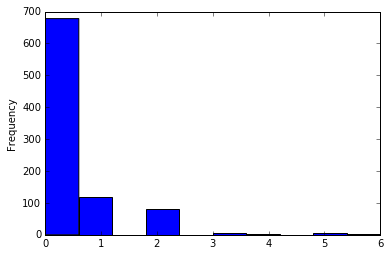

In [9]:
train['Parch'].plot.hist()

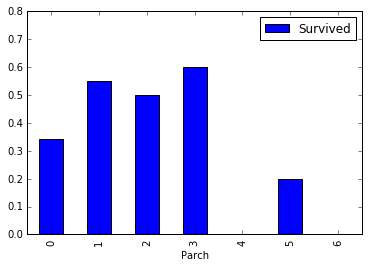

In [10]:
parch_pivot = train.pivot_table(index='Parch', values='Survived')
parch_pivot.plot.bar(ylim=(0,0.8))

In [11]:
combined = train['Parch']+train['SibSp']
survived = train['Survived']
df_dict = {
    'Combined': combined,
    'Survived': survived
}
combined_df = pd.DataFrame(df_dict)
combined_df['Combined'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Combined, dtype: int64

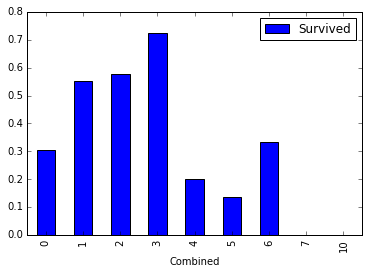

In [12]:
combined_df.pivot_table(index='Combined',values='Survived').plot.bar()

In [13]:
def isalone_process(df):
    family_count = df['SibSp']+df['Parch']
    df['isalone'] = family_count==0
    return df

In [14]:
train = isalone_process(train)
holdout = isalone_process(holdout)

In [15]:
train['isalone'].value_counts()

True     537
False    354
Name: isalone, dtype: int64

In [16]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    df = df.select_dtypes(include=np.number).dropna(axis=1)
    all_X = df.drop(['PassengerId','Survived'], axis=1)
    all_y = df['Survived']
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf, cv=10)
    selector.fit(all_X, all_y)
    best_features = list(all_X.columns[selector.support_])
    print(best_features)
    return best_features

In [17]:
best_features = select_features(train)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Miss', 'Title_Mr', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male']


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, features):
    all_X = df[features]
    all_y = df['Survived']
    model_list=[
        {
        'name':'LogisticRegression',
        'estimator':LogisticRegression(),
        'hyperparameters':
            {
            "solver": ["newton-cg", "lbfgs", "liblinear"]
            }
        },
        {
        'name':'KNeighborsClassifier',
        'estimator':KNeighborsClassifier(),
        'hyperparameters':
            {
                'n_neighbors':range(1,20,2),
                'weights':['distance','uniform'],
                'algorithm':['ball_tree','kd_tree','brute'],
                'p':[1,2]
            }
        },
        {
        'name':'RandomFOrestClassifier',
        'estimator':RandomForestClassifier(),
        'hyperparameters':
            {
                'n_estimators':[4,6,9],
                'criterion':['entropy','gini'],
                'max_depth':[2,5,10],
                'max_features':['log2','sqrt'],
                'min_samples_leaf':[1,5,8],
                'min_samples_split':[2,3,5]
            }
        }]
    for model in model_list:
        print(model['name'])
        print('-------------------')
        grid = GridSearchCV(model['estimator'],param_grid=model['hyperparameters'],cv=10)
        grid.fit(all_X,all_y)
        model['best_parameters'] = grid.best_params_
        model['best_score'] = grid.best_score_
        model['best_estimator'] = grid.best_estimator_
        
        print('best_parameters: {}'.format(model['best_parameters']))
        print('best_score: {}\n'.format(model['best_score']))
        
    return model_list

In [21]:
best_model = select_model(train, best_features)

LogisticRegression
-------------------
best_parameters: {'solver': 'newton-cg'}
best_score: 0.8092031425364759

KNeighborsClassifier
-------------------
best_parameters: {'algorithm': 'ball_tree', 'p': 1, 'weights': 'uniform', 'n_neighbors': 5}
best_score: 0.7721661054994389

RandomFOrestClassifier
-------------------
best_parameters: {'max_depth': 5, 'max_features': 'log2', 'criterion': 'entropy', 'min_samples_split': 3, 'min_samples_leaf': 1, 'n_estimators': 6}
best_score: 0.8372615039281706



In [22]:
def save_submission_file(model,cols,filename='submission.csv'):
    predictions = model.predict(holdout[cols])
    ids = holdout['PassengerId']
    df_dict = {
        'PassengerId':ids,
        'Survived':predictions
    }
    df = pd.DataFrame(df_dict)
    df.to_csv(filename,index=False)

In [24]:
save_submission_file(best_model[2]['best_estimator'], best_features)